In [1]:
import pandas as pd
import prophet
import matplotlib.pyplot as plt
%matplotlib inline
import fbprophet

In [2]:
data = pd.read_csv('semua.csv')
data.tail()

,Tanggal,Beras,Beras Kualitas Bawah I (kg),Beras Kualitas Bawah II (kg),Beras Kualitas Medium I (kg),Beras Kualitas Medium II (kg),Beras Kualitas Super I (kg),Beras Kualitas Super II (kg),Bawang Merah,Bawang Merah Ukuran Sedang (kg),Bawang Putih,Bawang Putih Ukuran Sedang (kg),Cabai Merah,Cabai Merah Besar (kg),Cabai Merah Keriting (kg),Cabai Rawit,Cabai Rawit Hijau (kg),Cabai Rawit Merah (kg)
1393,2021-05-24,11750.0,10700.0,10400.0,11800.0,11550.0,13050.0,12650.0,33100.0,33100.0,30450.0,30450.0,37200.0,40150.0,36000.0,49750.0,42100.0,57700.0
1394,2021-05-25,11750.0,10700.0,10400.0,11800.0,11550.0,13050.0,12650.0,33000.0,33000.0,30400.0,30400.0,36850.0,39600.0,35600.0,49100.0,41450.0,57000.0
1395,2021-05-26,11750.0,10700.0,10400.0,11800.0,11550.0,13075.0,12675.0,33100.0,33100.0,30525.0,30525.0,36525.0,39450.0,35250.0,48875.0,41400.0,56550.0
1396,2021-05-27,11750.0,10700.0,10400.0,11800.0,11550.0,13100.0,12700.0,33200.0,33200.0,30650.0,30650.0,36200.0,39300.0,34900.0,48650.0,41350.0,56100.0
1397,2021-05-28,11750.0,10700.0,10350.0,11800.0,11550.0,13050.0,12650.0,32850.0,32850.0,30400.0,30400.0,35350.0,38250.0,34350.0,47450.0,40400.0,54350.0


In [3]:
data['Tanggal'] = pd.to_datetime(data['Tanggal'], infer_datetime_format=True)

In [4]:
data = data.set_index('Tanggal')

In [4]:
data.columns = data.columns.str.replace(' ' , '_')

In [5]:
df = data[['Tanggal','Bawang_Merah']]

In [6]:
df.head()

,Tanggal,Bawang_Merah
0,2017-07-31,33500.0
1,2017-08-01,33200.0
2,2017-08-02,32950.0
3,2017-08-03,32650.0
4,2017-08-04,32150.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1398 entries, 0 to 1397
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Tanggal       1398 non-null   datetime64[ns]
 1   Bawang_Merah  1398 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 22.0 KB


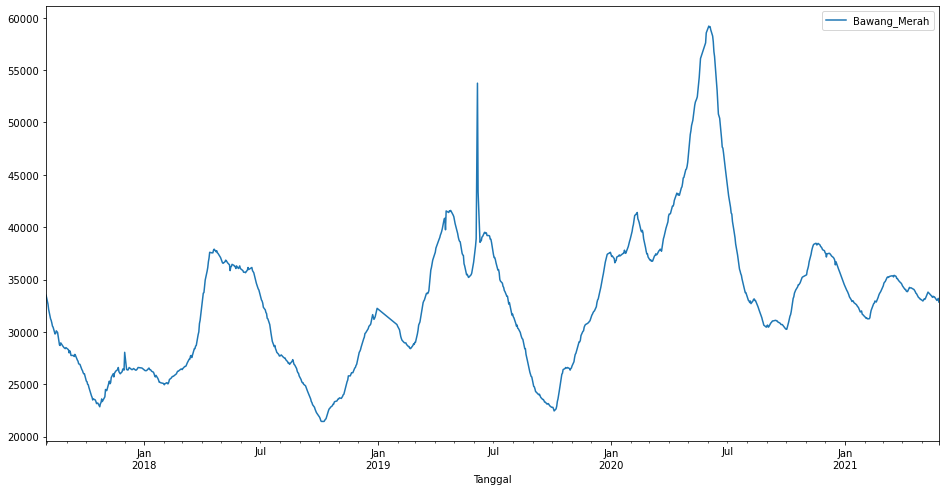

In [8]:
df.plot(x ='Tanggal', y ='Bawang_Merah', figsize=(16,8))

In [9]:
df.columns = ['ds','y']
df.head()

,ds,y
0,2017-07-31,33500.0
1,2017-08-01,33200.0
2,2017-08-02,32950.0
3,2017-08-03,32650.0
4,2017-08-04,32150.0


In [10]:
from fbprophet import Prophet

In [20]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [20]:
# Initialize the Model
model=Prophet()

In [21]:
df.columns

Index(['ds', 'y'], dtype='object')

In [22]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [24]:
### Create future dates of 90 days
future_dates=model.make_future_dataframe(periods=30)

In [25]:
future_dates.tail()

,ds
1423,2021-06-23
1424,2021-06-24
1425,2021-06-25
1426,2021-06-26
1427,2021-06-27


In [26]:
prediction=model.predict(future_dates)

In [27]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-07-31,36243.905017,29976.371831,35555.557261,36243.905017,36243.905017,-3301.689357,-3301.689357,-3301.689357,-12.615221,-12.615221,-12.615221,-3289.074136,-3289.074136,-3289.074136,0.0,0.0,0.0,32942.215660
1,2017-08-01,36177.166850,29859.408751,35465.099691,36177.166850,36177.166850,-3447.659040,-3447.659040,-3447.659040,-17.771452,-17.771452,-17.771452,-3429.887588,-3429.887588,-3429.887588,0.0,0.0,0.0,32729.507809
2,2017-08-02,36110.428683,29850.291041,35096.579470,36110.428683,36110.428683,-3552.536639,-3552.536639,-3552.536639,12.480095,12.480095,12.480095,-3565.016734,-3565.016734,-3565.016734,0.0,0.0,0.0,32557.892044
3,2017-08-03,36043.690515,29716.850031,35166.681646,36043.690515,36043.690515,-3661.169456,-3661.169456,-3661.169456,33.573673,33.573673,33.573673,-3694.743129,-3694.743129,-3694.743129,0.0,0.0,0.0,32382.521059
4,2017-08-04,35976.952348,29390.971935,34758.352195,35976.952348,35976.952348,-3830.117979,-3830.117979,-3830.117979,-10.727150,-10.727150,-10.727150,-3819.390829,-3819.390829,-3819.390829,0.0,0.0,0.0,32146.834369


In [28]:
prediction.loc[prediction['ds'] > '2021-04-30']

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1370,2021-05-01,29229.297330,33209.234288,38728.186286,29229.297330,29229.297330,6769.721228,6769.721228,6769.721228,1.850930,1.850930,1.850930,6767.870299,6767.870299,6767.870299,0.0,0.0,0.0,35999.018559
1371,2021-05-02,29185.661607,33349.877483,38567.252751,29185.661607,29185.661607,6712.554857,6712.554857,6712.554857,-6.790874,-6.790874,-6.790874,6719.345732,6719.345732,6719.345732,0.0,0.0,0.0,35898.216465
1372,2021-05-03,29142.025884,32953.017261,38379.841984,29142.025884,29142.025884,6657.016288,6657.016288,6657.016288,-12.615221,-12.615221,-12.615221,6669.631508,6669.631508,6669.631508,0.0,0.0,0.0,35799.042172
1373,2021-05-04,29098.390161,32996.585226,38309.416435,29098.390161,29098.390161,6603.195192,6603.195192,6603.195192,-17.771452,-17.771452,-17.771452,6620.966644,6620.966644,6620.966644,0.0,0.0,0.0,35701.585354
1374,2021-05-05,29054.754438,32907.669205,38309.868872,29054.754438,29054.754438,6588.102297,6588.102297,6588.102297,12.480095,12.480095,12.480095,6575.622202,6575.622202,6575.622202,0.0,0.0,0.0,35642.856735
1375,2021-05-06,29011.118715,32650.230779,38408.609602,29011.118715,29011.118715,6569.428822,6569.428822,6569.428822,33.573673,33.573673,33.573673,6535.855149,6535.855149,6535.855149,0.0,0.0,0.0,35580.547538
1376,2021-05-07,28967.482993,32654.708534,38028.443504,28967.482993,28967.482993,6493.134047,6493.134047,6493.134047,-10.727150,-10.727150,-10.727150,6503.861197,6503.861197,6503.861197,0.0,0.0,0.0,35460.617039
1377,2021-05-08,28923.847270,32613.773655,38045.836093,28923.847270,28923.847270,6483.578598,6483.578598,6483.578598,1.850930,1.850930,1.850930,6481.727669,6481.727669,6481.727669,0.0,0.0,0.0,35407.425868
1378,2021-05-09,28880.211547,32459.774280,37880.412829,28880.211547,28880.211547,6464.596611,6464.596611,6464.596611,-6.790874,-6.790874,-6.790874,6471.387485,6471.387485,6471.387485,0.0,0.0,0.0,35344.808157
1379,2021-05-10,28836.575824,32477.906893,37989.582487,28836.575824,28836.575824,6461.960109,6461.960109,6461.960109,-12.615221,-12.615221,-12.615221,6474.575329,6474.575329,6474.575329,0.0,0.0,0.0,35298.535932


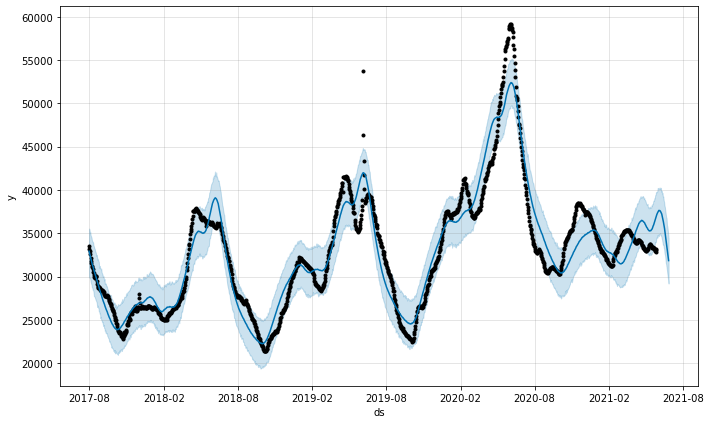

In [30]:
### plot the predicted projection
model.plot(prediction);

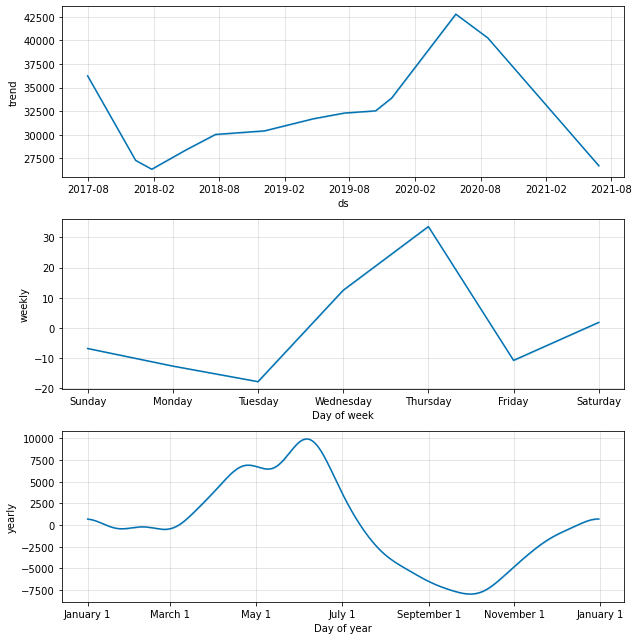

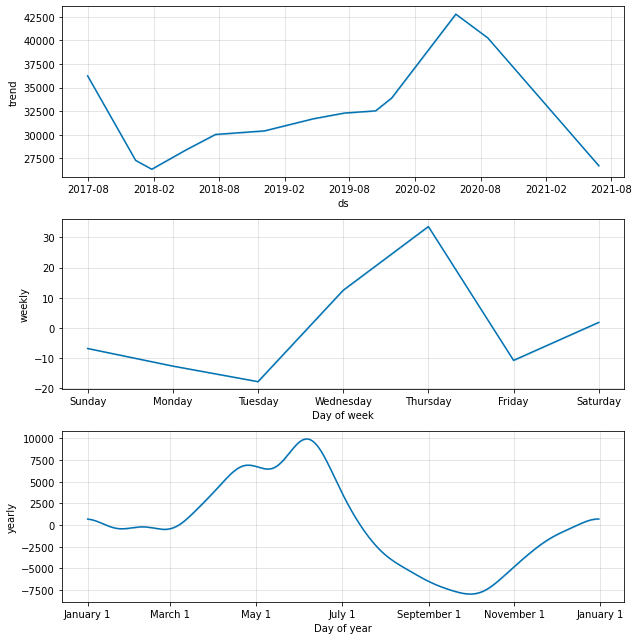

In [31]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

In [31]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 2 forecasts with cutoffs between 2019-11-02 00:00:00 and 2020-04-30 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-11-03,26048.881322,24786.440218,27260.871280,27016.666667,2019-11-02
1,2019-11-04,26138.240395,24917.385429,27473.326754,27150.000000,2019-11-02
2,2019-11-05,26241.387840,24958.869780,27504.478295,27550.000000,2019-11-02
3,2019-11-06,26395.900804,25141.416145,27688.317308,27850.000000,2019-11-02
4,2019-11-07,26559.219164,25344.419976,27873.255934,27950.000000,2019-11-02


In [33]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
725,2021-04-26,47935.697458,22743.643060,75388.288932,33300.0,2020-04-30
726,2021-04-27,47807.661731,23008.538326,74875.587906,33250.0,2020-04-30
727,2021-04-28,47698.669531,23006.989794,75181.590332,33200.0,2020-04-30
728,2021-04-29,47568.512054,21651.823454,74722.660942,33100.0,2020-04-30
729,2021-04-30,47294.046668,21549.412405,74767.793876,33100.0,2020-04-30


In [32]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,9.980980e+07,9990.485540,7506.116191,0.148569,0.074765,0.020548
1,38 days,1.035928e+08,10178.054594,7704.101034,0.151851,0.074765,0.006849
2,39 days,1.071705e+08,10352.320339,7885.086531,0.154790,0.098055,0.000000
3,40 days,1.103575e+08,10505.117919,8041.429872,0.157251,0.115889,0.000000
4,41 days,1.130125e+08,10630.733232,8176.341964,0.159413,0.127680,0.000000


In [34]:
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,coverage
324,361 days,8.701080e+07,9327.958125,8578.998056,0.254257,0.201956,1.0
325,362 days,8.969044e+07,9470.503679,8725.176063,0.258534,0.202713,1.0
326,363 days,9.228596e+07,9606.557923,8866.413067,0.262665,0.202713,1.0
327,364 days,9.478419e+07,9735.717008,9000.808056,0.266604,0.219690,1.0
328,365 days,9.709354e+07,9853.605195,9125.595755,0.270250,0.230614,1.0


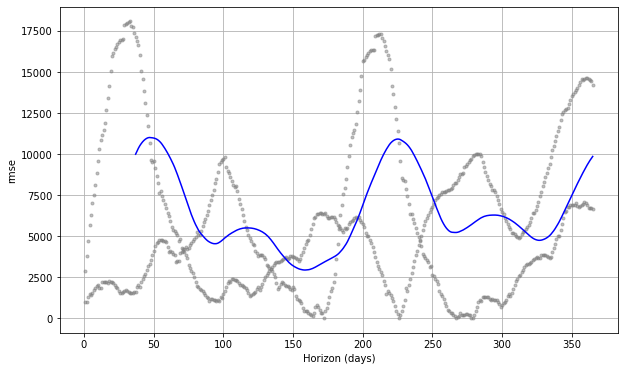

In [35]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')